In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import umap
from collections import OrderedDict

In [64]:
sns.set(style='white', context='notebook', rc={'figure.figsize': (12, 7)})
np.random.seed(42)

In [82]:
E13_hom_latent_data = pd.read_csv('./E13_hom_latent_output.csv', header=None)
E13_hom_labels = pd.read_csv('../data_qc/anno_E13_hom.csv')

E14_hom_latent_data = pd.read_csv('./E14_hom_latent_output.csv', header=None)
E14_hom_labels = pd.read_csv('../data_qc/anno_E14_hom.csv')

label_mapping_dict = {
    'Neural progenitors': 1,
    'Intermediate progenitors': 2,
    'Post-mitotic neurons': 3,
    'Ectopic cells': 4
}

E13_hom_num_labels = E13_hom_labels['cell_type'].map(label_mapping_dict)
E14_hom_num_labels = E14_hom_labels['cell_type'].map(label_mapping_dict)

Run UMAP

In [73]:
def draw_umap(data, labels, n_neighbors=5, min_dist=0.8, n_components=2, metric='euclidean', title=''):
    np.random.seed(42)
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        scatter = ax.scatter(u[:,0], range(len(u)), c=labels, cmap='tab10', marker='.')
    if n_components == 2:
        ax = fig.add_subplot(111)
        scatter = ax.scatter(u[:,0], u[:,1], c=labels, cmap='tab10', marker='.')
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(u[:,0], u[:,1], u[:,2], c=labels, s=100, cmap='tab10', marker='.')
    
    legend1 = ax.legend(*scatter.legend_elements(), loc="lower left", title="Cell type")
    ax.add_artist(legend1)
    plt.title(title, fontsize=24)

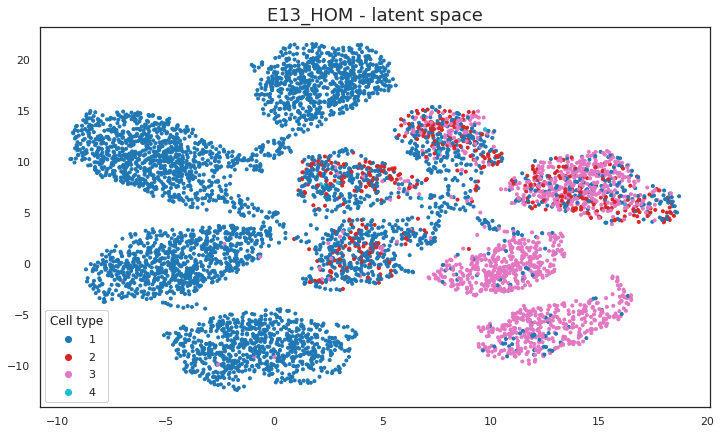

In [81]:
draw_umap(E13_hom_latent_data, E13_hom_num_labels, title='E13_HOM - latent space')

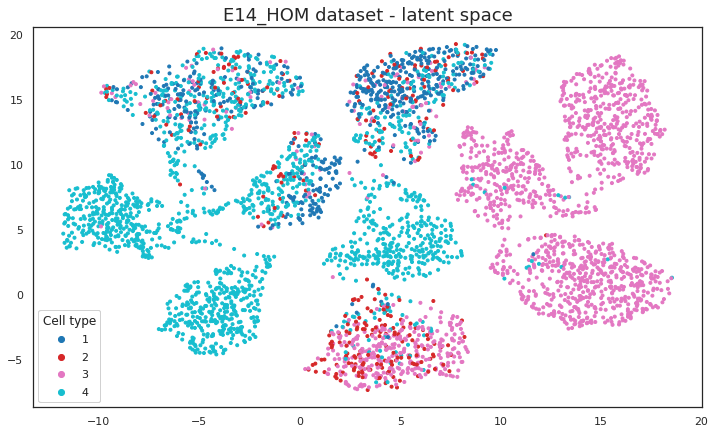

In [77]:
draw_umap(E14_hom_latent_data, E14_hom_num_labels, title='E14_HOM - latent space')